<a href="https://colab.research.google.com/github/pq2312/Risk-and-Returns-The-Sharpe-Ratio/blob/main/Risk_and_Returns_The_Sharpe_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I. EXECUTIVE SUMMARY** 

Let's learn about the Sharpe ratio by calculating it for the stocks of the two tech giants Facebook and Amazon in 2016. As benchmark we'll use the S&P 500 that measures the performance of the 500 largest stocks in the US. When we use a stock index instead of the risk-free rate, the result is called the Information Ratio and is used to benchmark the return on active portfolio management because it tells you how much more return for a given unit of risk your portfolio manager earned relative to just putting your money into a low-cost index fund.

Key findings:

*   In 2016, Amazon had a Sharpe ratio twice as high as Facebook, indicating that it generated higher risk-adjusted returns. This was mainly due to its higher average daily returns rather than a significant difference in risk compared to Facebook. 

*   The Sharpe ratio helps investors assess investment opportunities by adjusting returns for differences in risk, allowing for a fair comparison on an equal basis.

Data source: [Github](https://github.com/duncandam86/DataCamp-Projects/blob/master/TV%2C%20Halftime%20Shows%2C%20and%20the%20Big%20Game/datasets/super_bowls.csv) and [Datacamp](https://projects.datacamp.com/projects/66)

**II. ANALYSIS**

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ls /content/gdrive/MyDrive/Python-Practice/The-Sharpe

benchmark_data.csv  stock_data.csv


In [9]:
# Reading in the data
stock_data = pd.read_csv('/content/gdrive/MyDrive/Python-Practice/The-Sharpe/stock_data.csv', parse_dates=['Date'], index_col = ['Date'])
benchmark_data = pd.read_csv('/content/gdrive/MyDrive/Python-Practice/The-Sharpe/benchmark_data.csv', parse_dates=['Date'], index_col = ['Date']).dropna()

In [12]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
print(stock_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
print(benchmark_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71
2016-01-06  1990.26
2016-01-07  1943.09
2016-01-08  1922.0

**1. Plot & summarize daily prices for Amazon and Facebook**

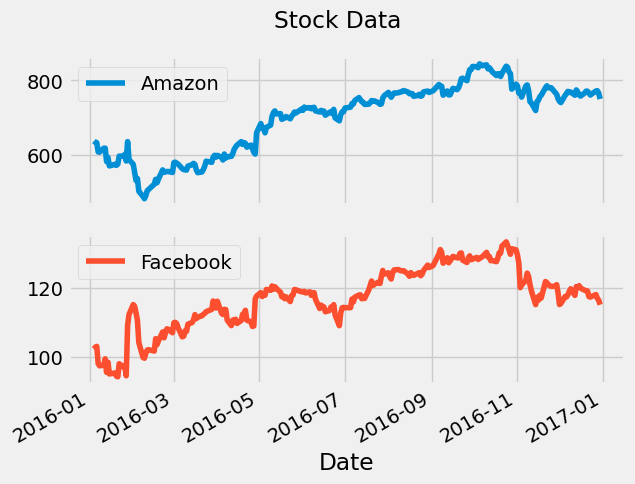

In [19]:
# visualize the stock_data
stock_data.plot(subplots = True, title = 'Stock Data');

In [20]:
# summarize the stock_data
stock_data.describe()

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


**2. Visualize & summarize daily values for the S&P 500**

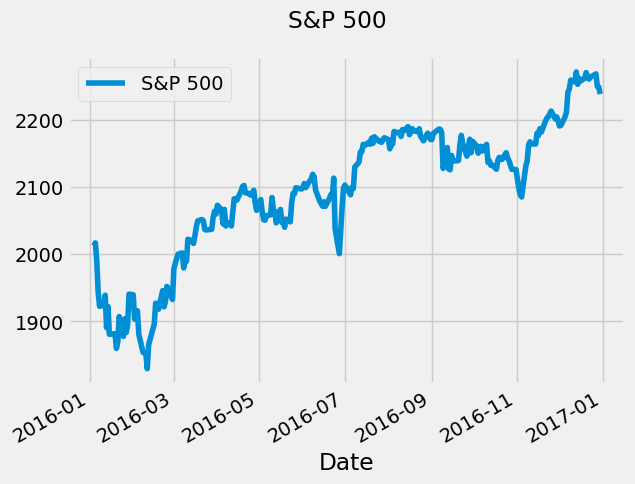

In [21]:
# visualize the benchmark_data
benchmark_data.plot(subplots = True, title = 'S&P 500');

In [22]:
# summarize the benchmark_data
benchmark_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


**3. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns**

The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.

However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio.



In [23]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

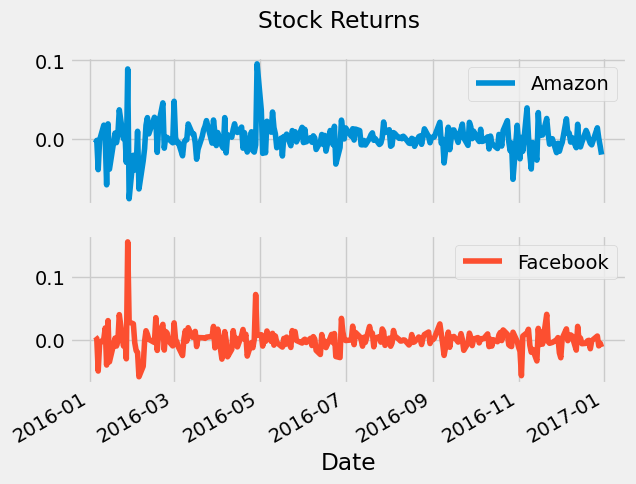

In [25]:
# plot the daily returns
stock_returns.plot(subplots = True, title = 'Stock Returns');

In [26]:
# summarize the daily returns
stock_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


**4. Daily S&P 500 returns**

In [27]:
# calculate daily benchmark_data returns
Series = benchmark_data['S&P 500']
sp_returns = Series.pct_change()

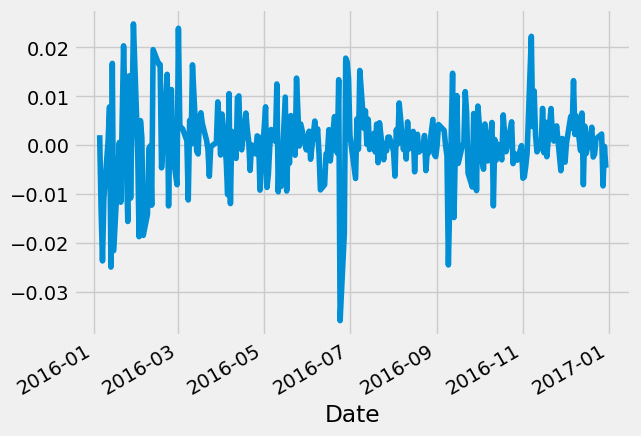

In [29]:
# plot the daily returns
sp_returns.plot();

In [30]:
# summarize the daily returns
sp_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

**5. Calculating Excess Returns for Amazon and Facebook vs. S&P 500**

Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

In [31]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

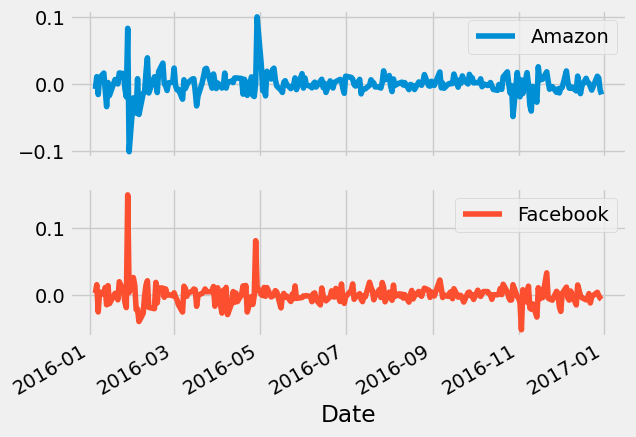

In [33]:
# plot the excess_returns
excess_returns.plot(subplots = True);

In [34]:
# summarize the excess_returns
excess_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


**6. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500**

Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

In [36]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

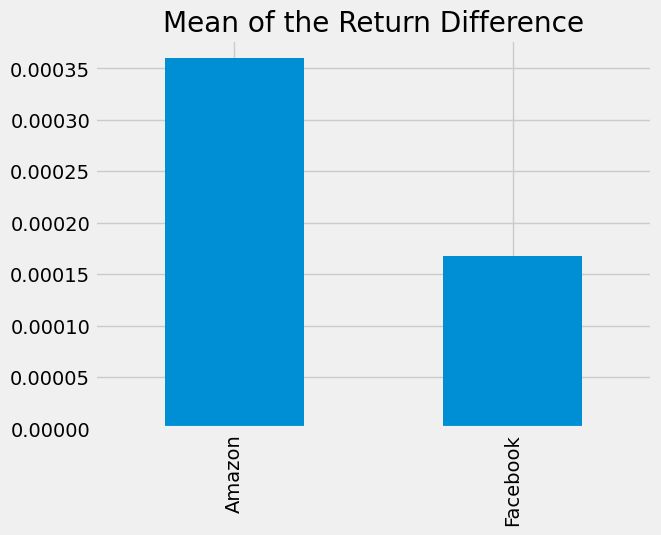

In [38]:
# plot avg_excess_returns
avg_excess_return.plot.bar(title = 'Mean of the Return Difference');

**7. The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference**

It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.

Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

In [39]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

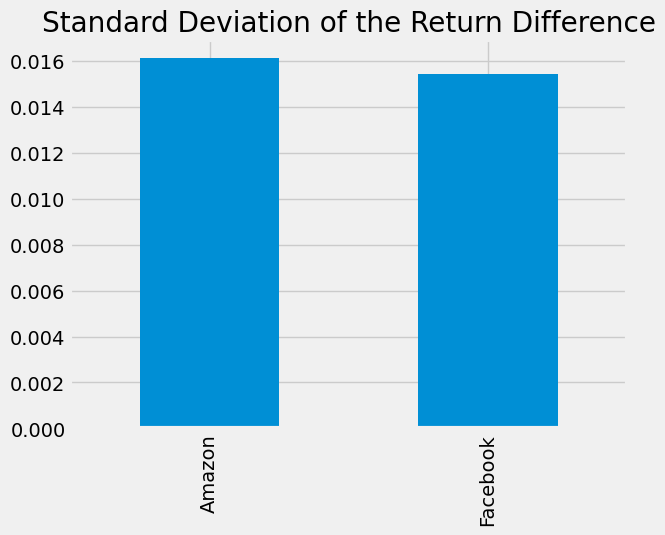

In [41]:
# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference');

**8. Putting it all together**

Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

In [42]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

In [43]:
# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

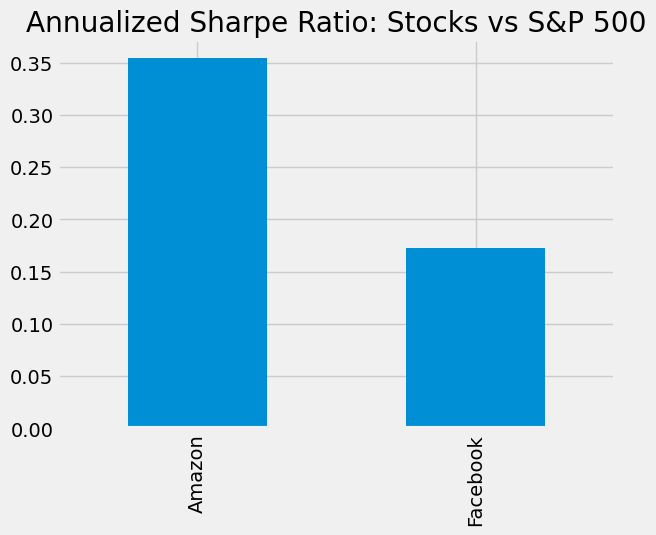

In [45]:
# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500');

**9. Conclusion**

Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.

This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.